In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

# Load merged data
final_merged = pd.read_csv(r"C:\Users\sejal\Dropbox\PC\Downloads\threshold.csv")

# Select Washington
df_wa = final_merged[final_merged["Buyer State"] == "WA"].copy()

# Overdose mortality rate per 100k
df_wa["overdose_rate"] = (
    df_wa["Deaths"] / df_wa["Population"] * 100000
)

# Relative year (Washington policy ~ 2012)
df_wa["relative_year"] = df_wa["Year"] - 2012


In [ ]:
# Short window around the policy
df_wa_window = df_wa[df_wa["relative_year"].between(-3, 2)]


In [ ]:
# Pre-period: -3, -2, -1
df_pre = df_wa_window[df_wa_window["relative_year"].isin([-3, -2, -1])]

# Post-period: 0, +1, +2
df_post = df_wa_window[df_wa_window["relative_year"].isin([0, 1, 2])]

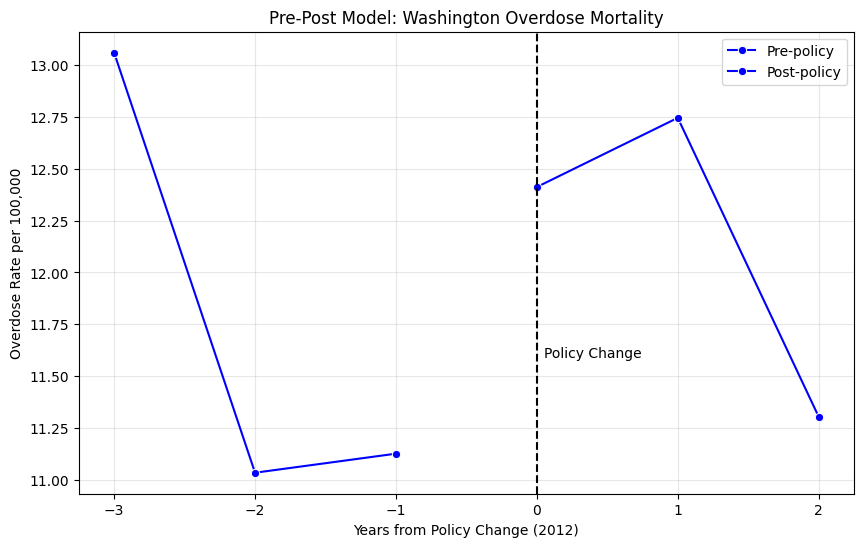

In [8]:
# Washington Pre–Post Overdose Mortality

plt.figure(figsize=(10, 6))

# PRE
sns.lineplot(
    data=df_pre,
    x="relative_year",
    y="overdose_rate",
    marker="o",
    color="blue",
    label="Pre-policy",
    errorbar=None
)

# POST
sns.lineplot(
    data=df_post,
    x="relative_year",
    y="overdose_rate",
    marker="o",
    color="blue",
    label="Post-policy",
    errorbar=None
)

# policy cutoff line
plt.axvline(0, linestyle="--", color="black")

plt.text(0.05,
         df_pre["overdose_rate"].mean(),
         "Policy Change")

plt.xlabel("Years from Policy Change (2012)")
plt.ylabel("Overdose Rate per 100,000")
plt.title("Pre-Post Model: Washington Overdose Mortality")
plt.grid(alpha=0.3)
plt.show()


In [10]:
# Aggregate yearly mean overdose rates for WA
df_year_wa = df_wa.groupby("Year", as_index=False)["overdose_rate"].mean()

# Focus on the same type of ±3-year window around the 2012 policy
df_year_wa = df_year_wa[(df_year_wa["Year"] >= 2009) & (df_year_wa["Year"] <= 2014)]

# Sort from highest to lowest overdose rate
df_year_wa = df_year_wa.sort_values("overdose_rate", ascending=False)

df_year_wa


,Year,overdose_rate
3,2009,13.058641
7,2013,12.744960
6,2012,12.411742
8,2014,11.305253
5,2011,11.127219
4,2010,11.035434


This table summarizes Washington’s county-level overdose mortality before and after the 2012 policy

In [19]:
# Long Window (−5 to +4 years)

df_wa_long = df_wa[df_wa["relative_year"].between(-5, 4)]

df_pre_long = df_wa_long[df_wa_long["relative_year"].isin([-5, -4, -3, -2, -1])]
df_post_long = df_wa_long[df_wa_long["relative_year"].isin([0, 1, 2, 3, 4])]

Plot Extended Pre–Post: Overdose Mortality

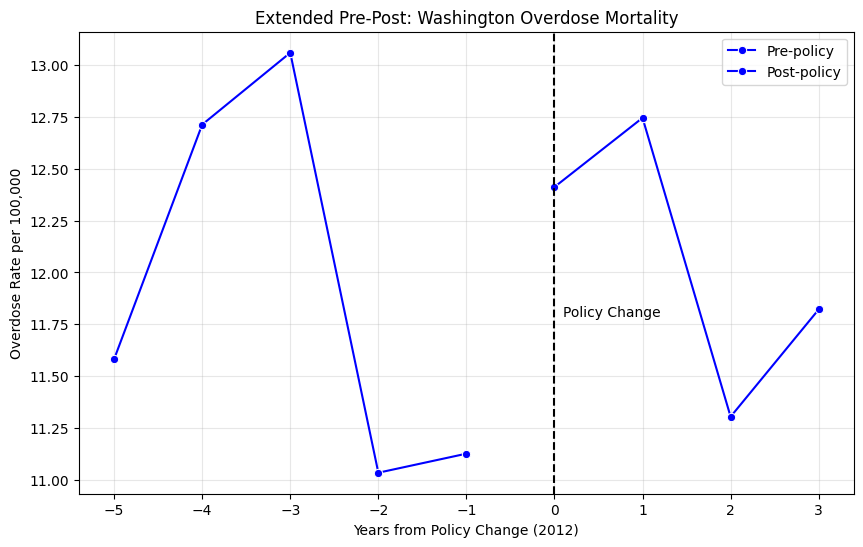

In [13]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_pre_long,
    x="relative_year",
    y="overdose_rate",
    marker="o",
    color="blue",
    errorbar=None,
    label="Pre-policy"
)

sns.lineplot(
    data=df_post_long,
    x="relative_year",
    y="overdose_rate",
    marker="o",
    color="blue",
    errorbar=None,
    label="Post-policy"
)

plt.axvline(0, linestyle="--", color="black")
plt.text(0.1, df_pre_long["overdose_rate"].mean(), "Policy Change")

plt.xlabel("Years from Policy Change (2012)")
plt.ylabel("Overdose Rate per 100,000")
plt.title("Extended Pre-Post: Washington Overdose Mortality")
plt.grid(alpha=0.3)
plt.show()


The extended pre–post analysis does not support a meaningful reduction in overdose deaths following the 2012 Washington policy. Changes appear to continue a pattern already underway before the policy, and post-policy mortality fluctuates without showing a sustained downward trend.

Pre-Post for Washington: Opioid Per Capita

In [17]:
df_wa["opioid_per_capita"] = df_wa["Total_MME"] / df_wa["Population"]

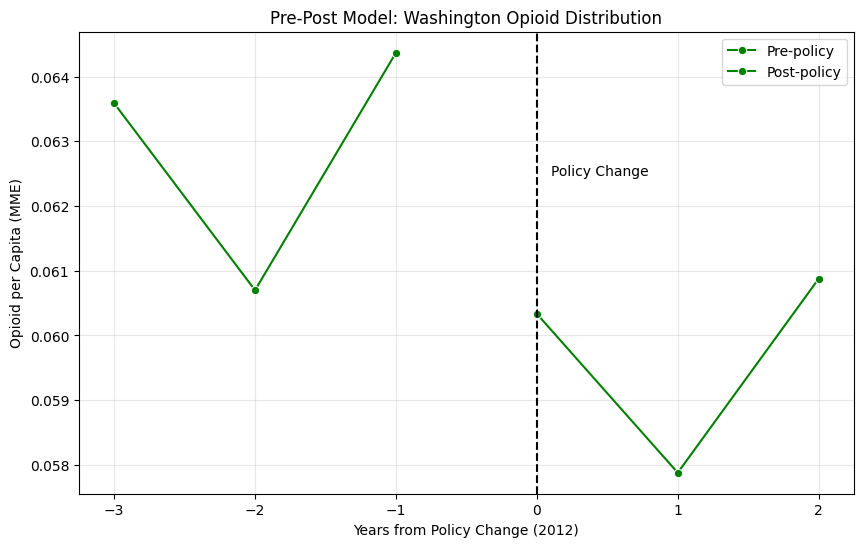

In [18]:
plt.figure(figsize=(10, 6))

# PRE
sns.lineplot(
    data=df_pre,
    x="relative_year",
    y="opioid_per_capita",
    marker="o",
    color="green",
    label="Pre-policy",
    errorbar=None
)

# POST
sns.lineplot(
    data=df_post,
    x="relative_year",
    y="opioid_per_capita",
    marker="o",
    color="green",
    label="Post-policy",
    errorbar=None
)

plt.axvline(0, linestyle="--", color="black")
plt.text(0.1, df_pre["opioid_per_capita"].mean(), "Policy Change")

plt.xlabel("Years from Policy Change (2012)")
plt.ylabel("Opioid per Capita (MME)")
plt.title("Pre-Post Model: Washington Opioid Distribution")
plt.grid(alpha=0.3)
plt.show()


The pre-post analysis for Washington shows a small decline in opioid per-capita distribution immediately after the 2012 policy but no lasting effect. Opioid supply drops slightly in the policy year and reaches a short-run low in the following year, but by year +2 it rebounds close to pre-policy levels. This suggests that the policy produced only a temporary reduction in opioid distribution, with no sustained long-term impact.

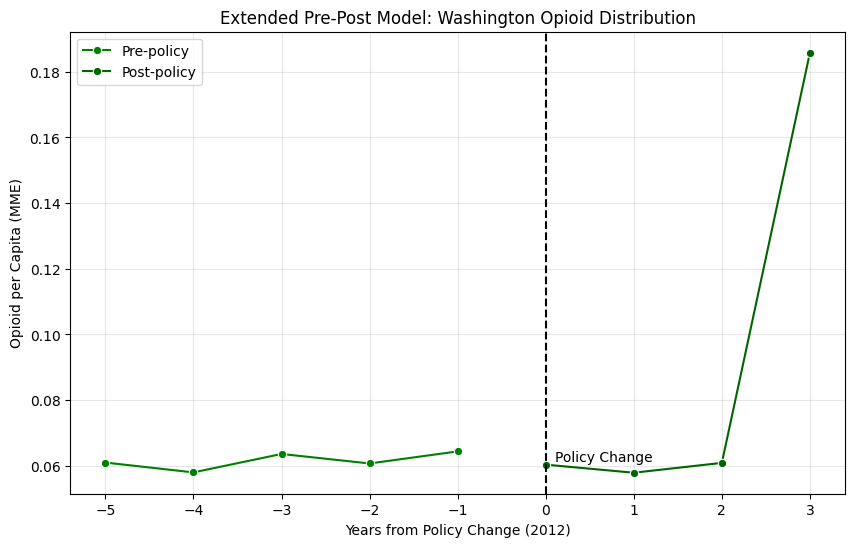

In [ ]:
# Extended Pre-Post Plot for Washington: Opioid per Capita

plt.figure(figsize=(10, 6))

# PRE line (−5 to −1)
sns.lineplot(
    data=df_pre_long,
    x="relative_year",
    y="opioid_per_capita",
    marker="o",
    color="green",
    label="Pre-policy",
    errorbar=None
)

# POST line (0 to +4)
sns.lineplot(
    data=df_post_long,
    x="relative_year",
    y="opioid_per_capita",
    marker="o",
    color="darkgreen",
    label="Post-policy",
    errorbar=None
)

# Vertical policy change line
plt.axvline(0, color="black", linestyle="--")

# Annotation
plt.text(
    0.1,
    df_pre_long["opioid_per_capita"].mean(),
    "Policy Change",
    fontsize=10
)

plt.xlabel("Years from Policy Change (2012)")
plt.ylabel("Opioid per Capita (MME)")
plt.title("Extended Pre-Post Model: Washington Opioid Distribution")

plt.grid(alpha=0.3)
plt.show()



Washington’s extended pre-post trend shows that opioid per-capita levels were stable before the 2012 policy and did not meaningfully decline immediately afterward.
 Instead, distribution remained flat through the first two post-policy years, followed by a sharp spike by year +3, far exceeding any pre-policy levels. This suggests the policy did not produce a lasting reduction in opioid supply, and longer-run trends indicate a strong rebound rather than sustained control.